# Примеры лабораторной работы

###### Задание 8.1. 
Загрузить библиотеку numpy, файл bin.jpg и преобразовать его с помощью операций дилатация и эрозия. Выбрать ядро, размер которого равен последней цифре в номере списка группы. Здесь ядро 5×5. Выполним сначала операцию дилатации, затем и эрозии.

In [2]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [56]:
img = cv2.imread('img/sun.jpeg',0)

In [57]:
kernel = np.ones((5,5), np.uint8)

In [58]:
dilation = cv2.dilate(img,kernel,iterations = 1)
erosion = cv2.erode(img, kernel,iterations = 1)

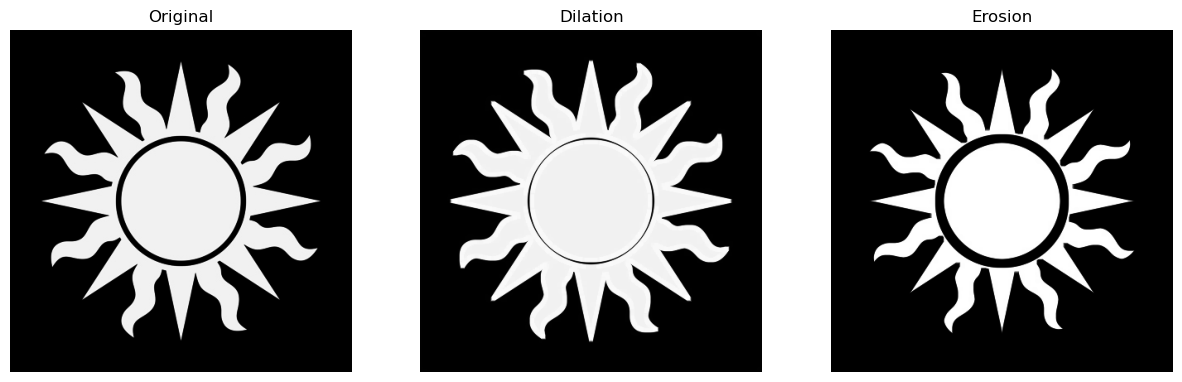

In [59]:
plt.figure(figsize=(15,15))

plt.subplot(131),
plt.imshow(img,cmap = 'gray'),plt.title("Original"),
plt.axis('off')

plt.subplot(132),
plt.imshow(dilation,cmap = 'gray'),plt.title("Dilation"),
plt.axis('off')

plt.subplot(133),
plt.imshow(erosion,cmap = 'gray'),plt.title("Erosion"),
plt.axis('off');

###### Задание 8.2 - 8.3.
Для демонстрации удаления шума создать зашумленный файл, затем к зашумленному файлу применить операцию открытия.

In [68]:
image = Image.open('img/sun_w.jpeg')

In [69]:
def add_salt_and_pepper_noise(image, noise_ratio):
    width, height = image.size
    num_noise_pixels = int(noise_ratio * width * height)

    draw = ImageDraw.Draw(image)

    for _ in range(num_noise_pixels):
        x = random.randint(0, width-1)
        y = random.randint(0, height-1)
        color = random.randint(0, 255)
        draw.point((x, y), fill=color)

    return image

In [70]:
image.save("img/median.png", "JPEG")

In [71]:
median = cv2.imread("img/median.png", 1)

In [72]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))

In [73]:
opening = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(median, cv2.MORPH_CLOSE, kernel)

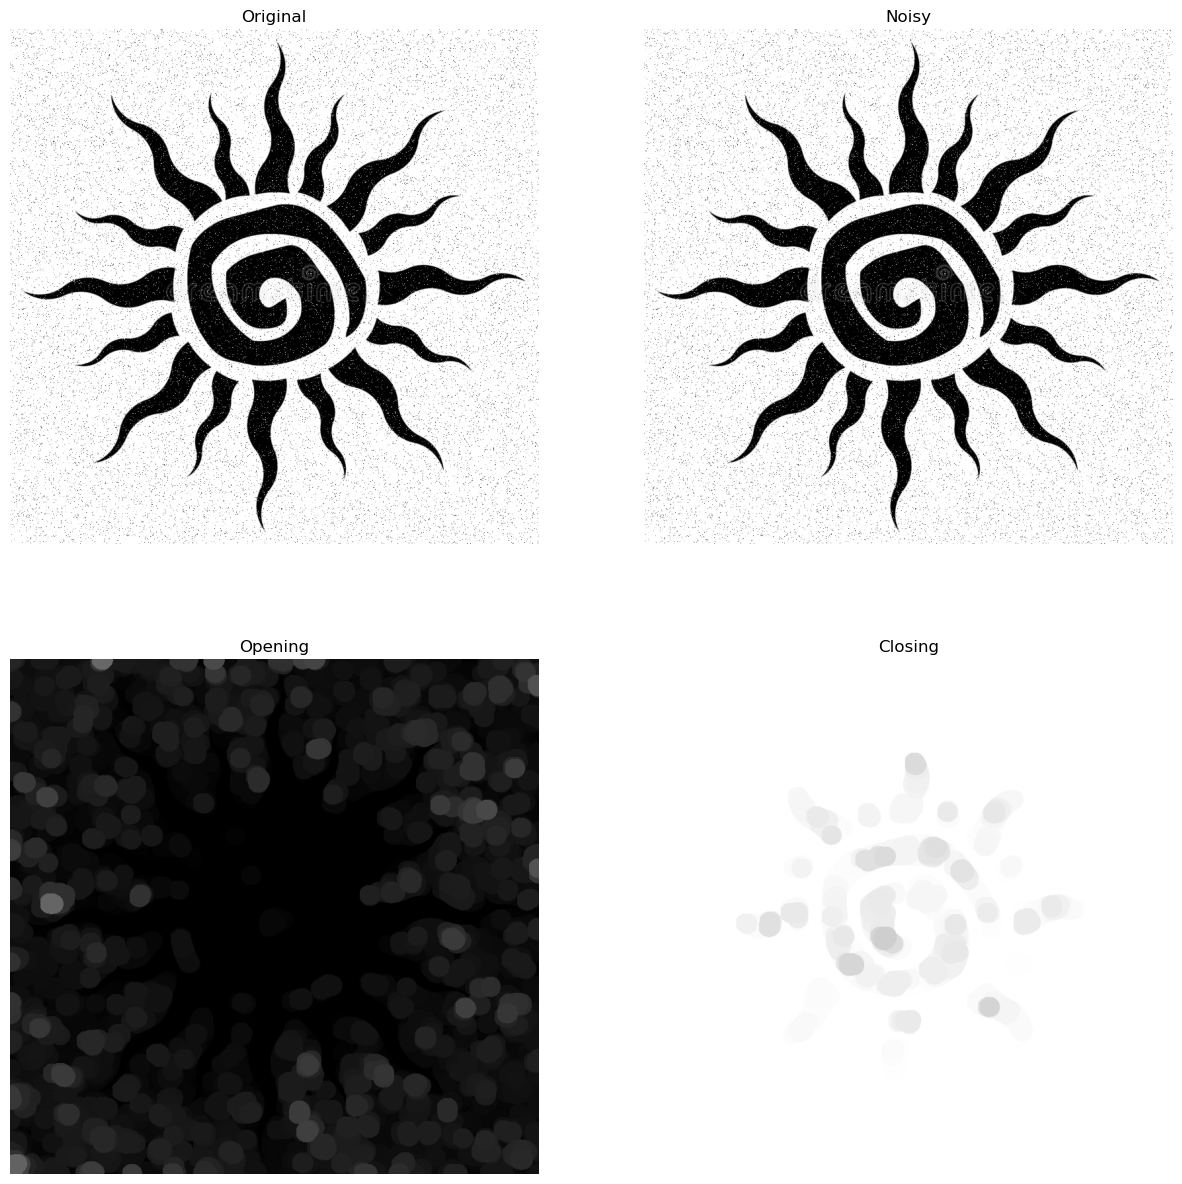

In [76]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(222)
plt.imshow(median, cmap='gray')
plt.title("Noisy")
plt.axis('off')

plt.subplot(223)
plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis('off')

plt.subplot(224)
plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis('off')

plt.show()

###### Задание 8.4. 
Трансформировать цветное изображение в полутоновое при его загрузке. Скопировать полутоновое изображение. К первому изображению применить операцию расширения, ко второму эрозию. Затем вычесть из расширенного изображения изображение после эрозии. Результат похож на контур объекта.

In [20]:
image = cv2.imread('img/ul.jpeg')

In [21]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [22]:
copied_image = gray_image.copy()

In [23]:
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(gray_image, kernel, iterations=1)

In [24]:
eroded_image = cv2.erode(copied_image, kernel, iterations=1)

In [25]:
result_image = dilated_image - eroded_image

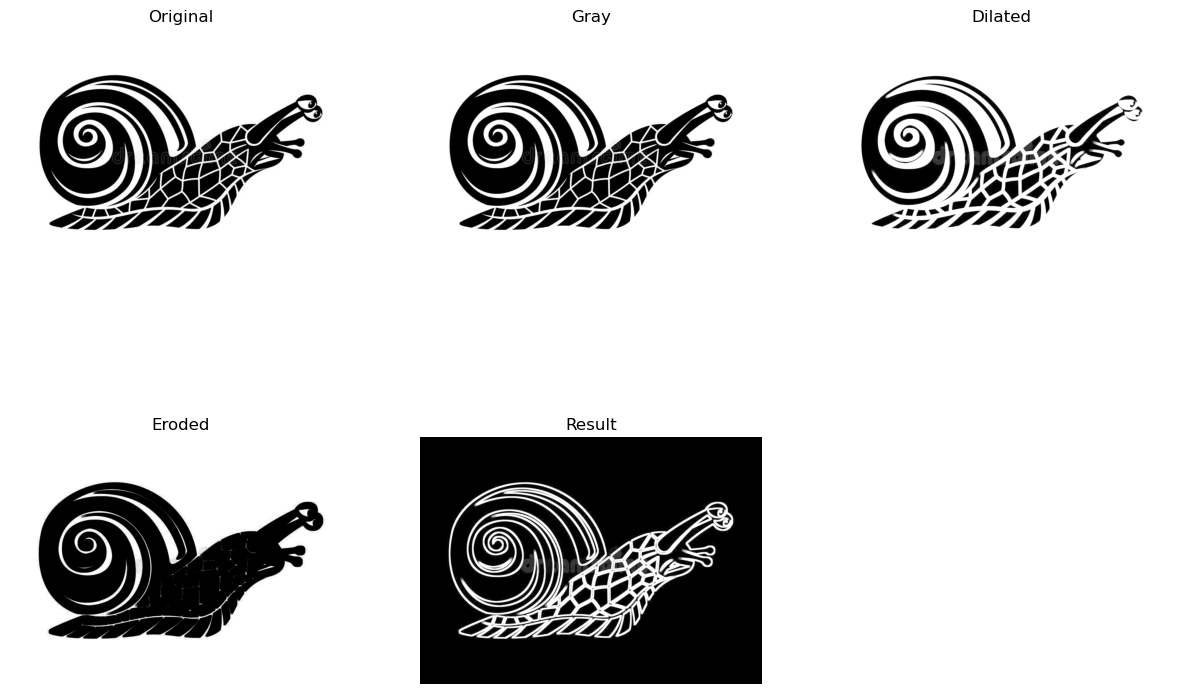

In [26]:
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(332)
plt.imshow(gray_image, cmap='gray')
plt.title("Gray")
plt.axis('off')

plt.subplot(333)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated")
plt.axis('off')

plt.subplot(334)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded")
plt.axis('off')

plt.subplot(335)
plt.imshow(result_image, cmap='gray')
plt.title("Result")
plt.axis('off')

plt.show()

###### Задание 8.5. 
Применить операцию цилиндр к изображению, размер ядра равен 40 + No, No – номер по списку группы.

In [43]:
image = cv2.imread("img/sun.jpeg")

In [49]:
result = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, (52,52))

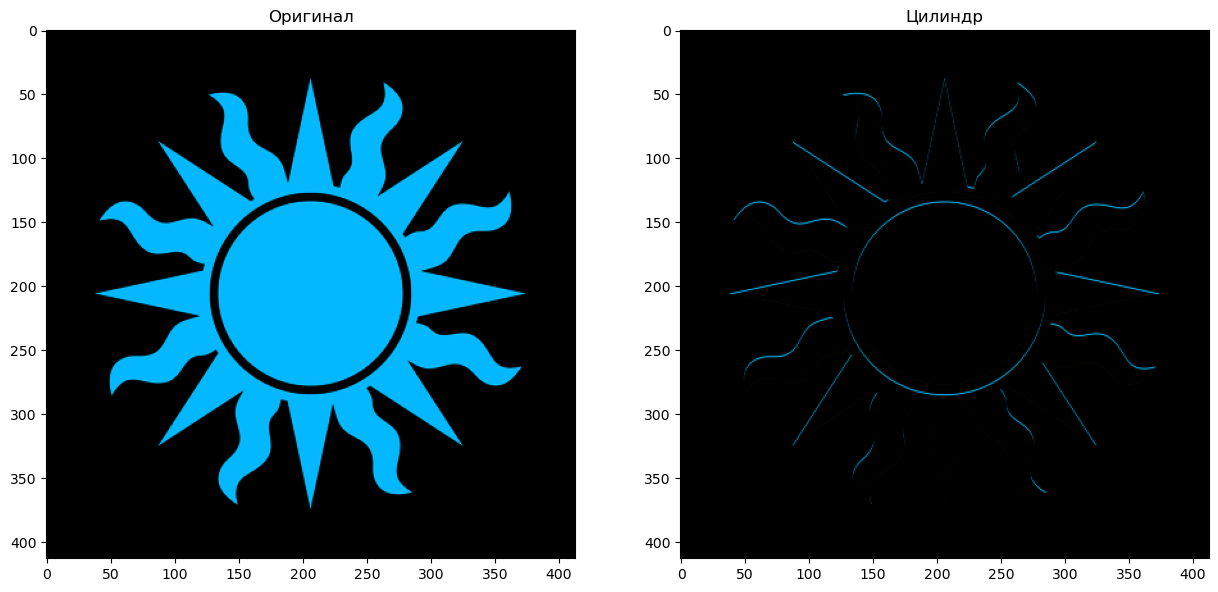

In [50]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Оригинал")

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Цилиндр")

plt.show()

###### Задание 8.6.
Применить операцию черная шляпа к изображению, размер ядра равен 40 + No, No – номер по списку группы.

In [51]:
result = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, (52,52))

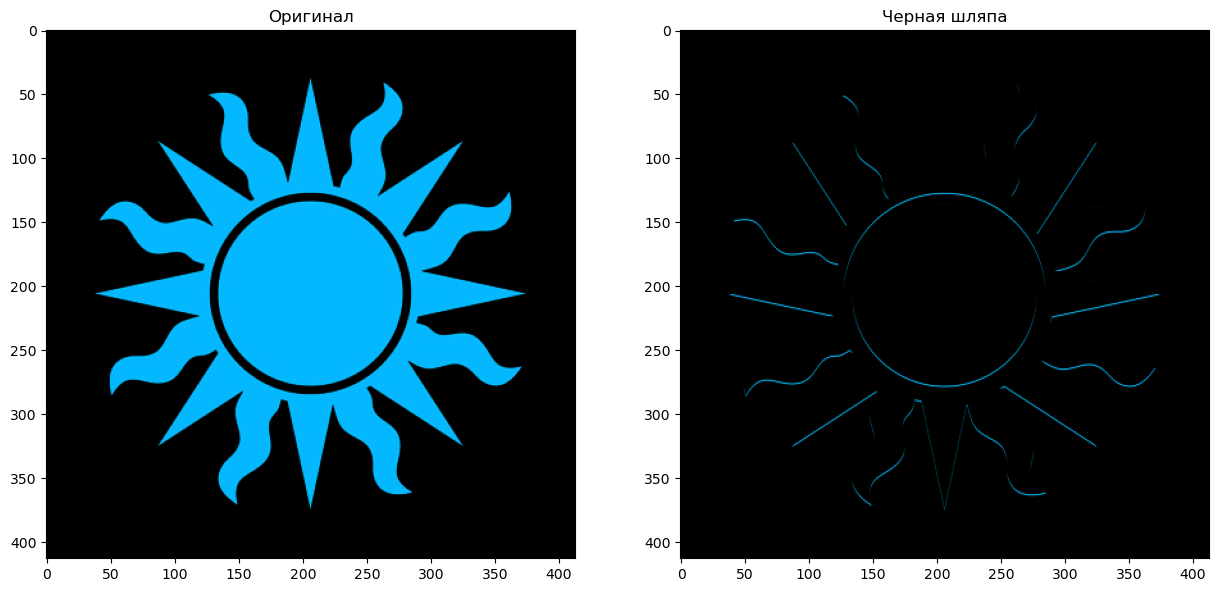

In [56]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Оригинал")

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Черная шляпа")

plt.show()

###### Задание 8.7. 
Изготовить ядро, его размер выбрать из ряда 3x3, 3x5, 5x3, 5x5, 5x7, 3x7, 7x3, 7x5, 5x7, 7x7, номер варианта должен быть равен номеру по списку группы (3x5).
Обработать изображение с помощью выбранного ядра и ядра размером 9x9. Сравнить результаты обработки изображения этими ядрами.

In [69]:
imge = cv2.imread('img/auto.jpg', 0)
img = cv2.resize(imge, (900, 600))

In [70]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

In [71]:
result1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
result2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

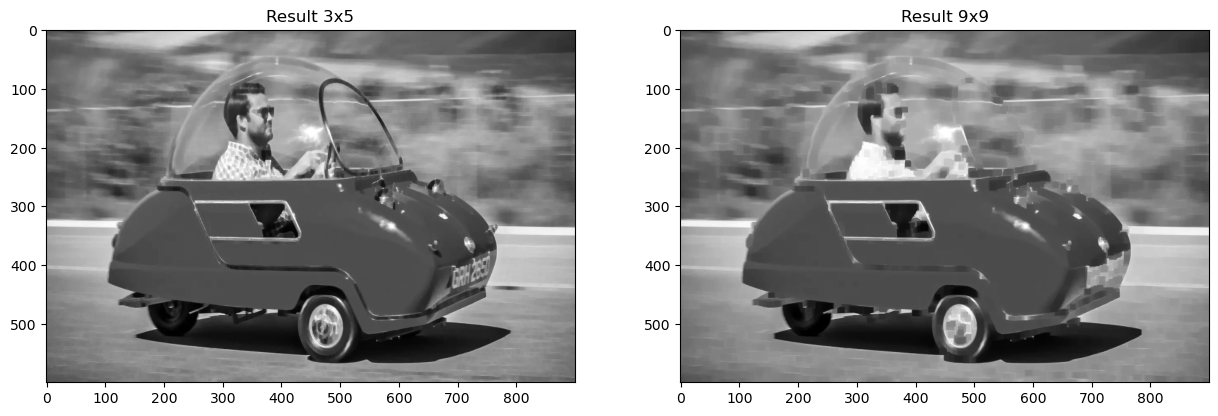

In [73]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(result1, cmap="gray")
plt.title("Result 3x5")

plt.subplot(122)
plt.imshow(result2, cmap="gray")
plt.title("Result 9x9")

plt.show();